In [2]:
import pandas as pd
import numpy as np

from sklearn import datasets
iris= datasets.load_iris() #내장 데이터셋 읽어오기

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
#loc[행:열] 


In [3]:
#svm(support vector machine) - 모든 데이터를 벡터 공간내의 좌표에 점으로 표시하고 각 데이터가 속하는 클래스별로 군집을
#이룬다고 가정한다.
#각 군집까지의 거리를 최대한 멀리 유지하는 경계면을 찾는다. 이렇게하면 각 군집을 서로 확연하게 구분할 수 있다.
#각 군집을 구분하는 경계면을 찾으면 새로운 데이터가 주어졌을 때 공간의 좌표에서 어느 군집에 속하는지 분류할 수 있다.

In [4]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.columns =['sepal_length','sepal_width','petal_length','petal_width']
df['target'] = iris['target']
df= df.drop_duplicates()
X_data=df.loc[:,'sepal_length':'petal_width']
y_data =df.loc[:,'target']

X_train, X_test,y_train,y_test= train_test_split(X_data,y_data,test_size=0.2,shuffle=True,random_state=20)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
y_knn_pred=knn.predict(X_test)
knn_acc=accuracy_score(y_test,y_knn_pred)

In [6]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3, random_state=0)
dtc.fit(X_train,y_train)
y_dtc_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, y_dtc_pred)

In [7]:
from sklearn.svm import SVC
# svc = SVC(kernel='rbf') #파라미터 rbf: Radial Basis Function 곡선 경계, 가장 많이 쓰임
# svc=SVC(kernel = 'linear' ) #파라미터 linear: 기본값
svc=SVC(kernel = 'poly' ) #파라미터 linear: 기본값
svc.fit(X_train,y_train)

SVC(kernel='poly')

In [8]:
y_svc_pred=svc.predict(X_test)
y_svc_pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 2, 2])

In [9]:
svc_acc=accuracy_score(y_test,y_svc_pred)

svc_acc

0.9666666666666667

In [10]:
#로지스틱 회귀 Logistic Regression
#함수의 출력값을(0~1 사이의 실수) 각 분류 클래스에 속하게 될 확률값으로 사용된다.
#아이리스 데이터를 학습해서 각 품종에 속할 확률을 계산하여 1에 가까우면 해당 클래스로 분류하고
#0에 가까우면 아니다라고 분류한다.

In [11]:
from sklearn.linear_model import LogisticRegression

lrc= LogisticRegression()
lrc.fit(X_train,y_train)

LogisticRegression()

In [12]:
y_lrc_pred=lrc.predict(X_test)
y_lrc_pred

array([0, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 0, 2, 2])

In [13]:
lrc_acc=accuracy_score(y_test,y_lrc_pred)

lrc_acc

1.0

In [14]:
y_lrc_prob=lrc.predict_proba(X_test)
y_lrc_prob

array([[9.83094458e-01, 1.69054840e-02, 5.76296333e-08],
       [4.60695615e-03, 8.41458027e-01, 1.53935017e-01],
       [1.03674499e-02, 9.20150901e-01, 6.94816493e-02],
       [2.57653526e-05, 5.16404333e-02, 9.48333801e-01],
       [2.39285809e-02, 9.52024076e-01, 2.40473431e-02],
       [2.93669482e-02, 9.25894878e-01, 4.47381739e-02],
       [4.78594971e-06, 1.77678254e-02, 9.82227389e-01],
       [9.80412565e-01, 1.95873212e-02, 1.13561879e-07],
       [1.22340869e-05, 6.66975005e-02, 9.33290265e-01],
       [9.75406662e-01, 2.45932737e-02, 6.41393285e-08],
       [2.73416875e-05, 2.71305410e-02, 9.72842117e-01],
       [1.71527827e-03, 7.49886906e-01, 2.48397816e-01],
       [7.53070949e-04, 4.91860885e-01, 5.07386045e-01],
       [9.84534292e-01, 1.54656799e-02, 2.81278367e-08],
       [9.76953930e-01, 2.30460066e-02, 6.38290485e-08],
       [1.28093730e-03, 2.60492146e-01, 7.38226916e-01],
       [9.91798182e-01, 8.20180674e-03, 1.12005864e-08],
       [4.15672008e-03, 8.61227

In [15]:
#앙상블 - 여러 모델을 결합하여 성능을 높이는 방법. 하나의 모델 예측에 의존하는 것보다 여러 모델의 예측을 결합하여
#최종 예측값을 결정하는 방법 보팅 
#Voting - 여러 개의 모델이 예측한 값을 종합하여 최종 예측값을 결정하는데 모델들이 예측한 값 중에서 다수결로 최종 분류 클래스를 정한다.
# 예) 1. a 2. b 3. a 이렇게 나오면 a로  분류

In [16]:
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators =[('KNN',knn),('SVM',svc),('DT',dtc)],voting='hard')

#voting= 'hard' ***3개의 모델이 예측한 값 중에서 다수결로 최종 분류 클래스를 정한다.
#voting= 'soft' 3개의 모델의 각 분류 클래스별 예측 확률을 평균하여 최종 클래스를 결정한다.
#soft는 예측 확률을 평균만 내서 하는거라 예측값 출력 불가

hvc.fit(X_train,y_train)

y_hvc_pred=hvc.predict(X_test)
print('예측값: ',y_hvc_pred)

hvc_acc = accuracy_score(y_test,y_hvc_pred)
print('정확도: ',hvc_acc)

예측값:  [0 1 1 2 1 1 2 0 2 0 2 1 2 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 2]
정확도:  1.0


In [17]:
#배깅 bagging - 전체 학습 데이터 중에서 서로 다른 데이터를 샘플링하여 학습한다.

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,max_depth=3,random_state=20)

rfc.fit(X_train,y_train)


#예측
y_pred= rfc.predict(X_test)
y_pred

#평가
rfc_acc=accuracy_score(y_test,y_pred)
rfc_acc


0.9666666666666667

In [18]:
#회귀 모델 - 보스턴 지역의 주택 가격을 예측해보자
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [19]:
housing = datasets.load_boston()
housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [20]:
hData= pd.DataFrame(housing['data'], columns=housing['feature_names'])
hData

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [21]:
target=pd.DataFrame(housing['target'],columns=['Target'])
target

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [22]:
print(hData.shape)
print(target.shape)

(506, 13)
(506, 1)


In [23]:
#hData
#crim 범죄 발생률, zn 주택용 토지 비율, indus 상업 지역 까지 거리, chas 강 인접 여부(인접1,아님0), nox 공기 오염도, rm방의 개수
#age 집의 연식, dis 고용지역까지의 거리, rad고속도로 접근성, tax 재산세, prtatio 교사 학생 비율, b 흑인 거주비율
#lstat 저소득층 비율

In [24]:
df = pd.concat([hData,target],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [26]:
df_corr=df.corr()

<AxesSubplot:>

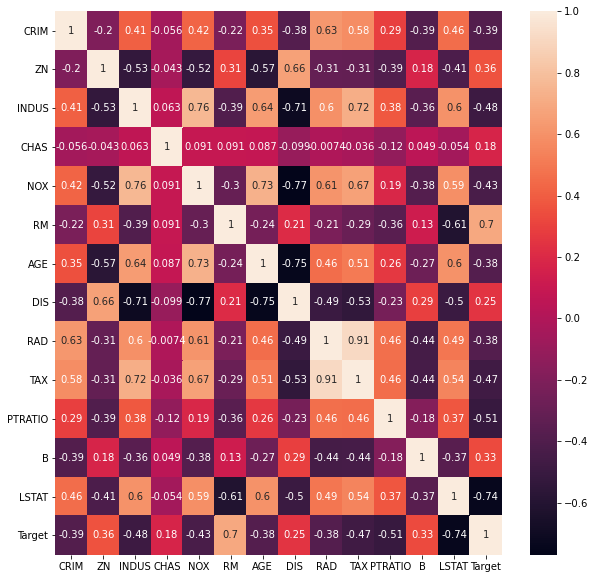

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True)

In [28]:
corr_order = df.corr().loc[:'LSTAT','Target'].abs().sort_values(ascending=False)

corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [29]:
plot_cols=['Target','LSTAT','RM','PTRATIO','INDUS']
plot_df = df.loc[:,plot_cols]
plot_df

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18
...,...,...,...,...,...
501,22.4,9.67,6.593,21.0,11.93
502,20.6,9.08,6.120,21.0,11.93
503,23.9,5.64,6.976,21.0,11.93
504,22.0,6.48,6.794,21.0,11.93


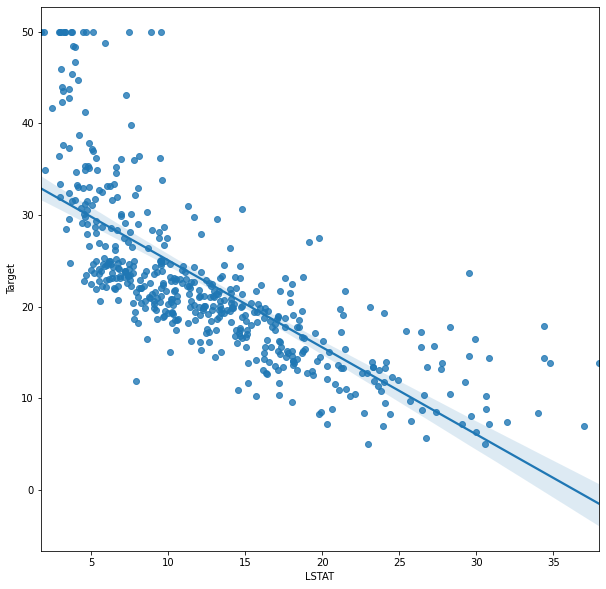

In [30]:
plt.figure(figsize=(10,10))

sns.regplot(x='LSTAT',y='Target',data=plot_df)
plt.show()

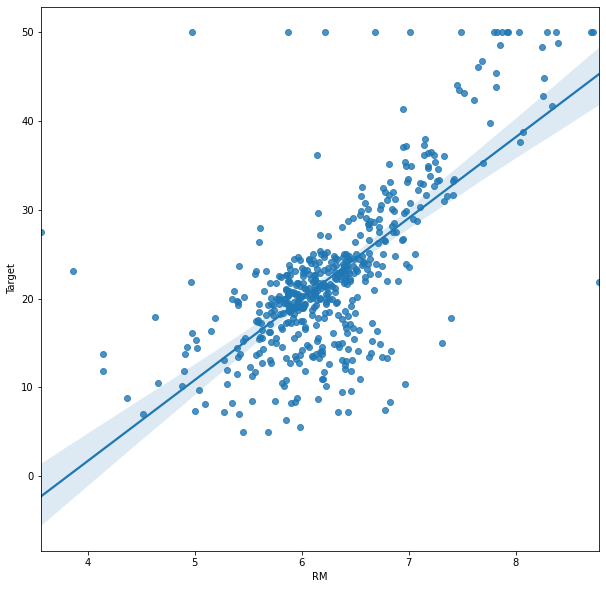

In [31]:
plt.figure(figsize=(10,10))

sns.regplot(x='RM',y='Target',data=plot_df)
plt.show()

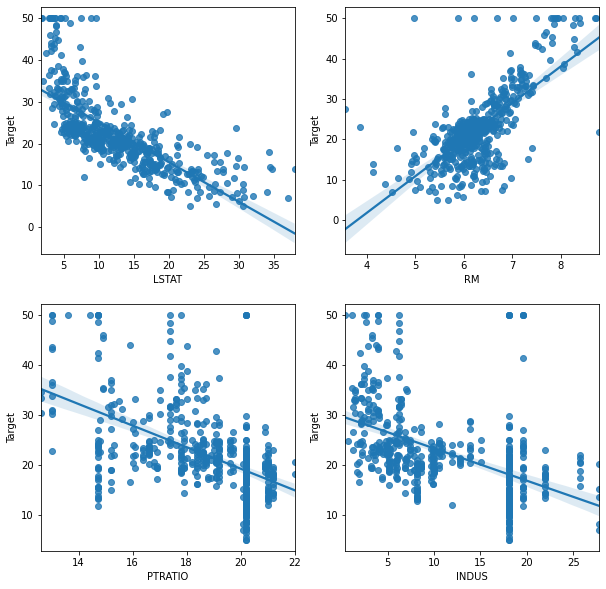

In [32]:
plt.figure(figsize=(10,10))

for idx,col in enumerate(plot_cols[1:]):
    ax1= plt.subplot(2,2,idx+1)    
    sns.regplot(x=col,y='Target',data=plot_df, ax=ax1)
plt.show()

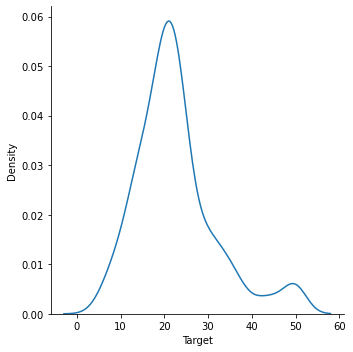

In [33]:
sns.displot(x='Target',kind='kde',data=plot_df)


In [34]:
#피처 스케일링
#피처(열)의 데이터 크기에 따른 상대적 영향력의 차이를 제거 하기 위해서 
#피처들의 크기를 비슷한 수준으로 맞춰주는 작업이 중요하다.

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

df_scaled = df.iloc[:,:-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

df.iloc[:,:-1] =df_scaled[:,:]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [35]:
#학습 데이터와 검증 데이터로 분할
X_data = df.loc[:,['LSTAT','RM']]
y_data = df.loc[:,'Target']

X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2,shuffle=True,random_state=1)

In [36]:
#선형회귀(베이스라인 모델) 의사결정나무 랜덤포레스트, XGBoost(?)